In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive 
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/My Drive/preprocessed_data.csv')

In [ ]:
df.drop(columns=df.columns[0], axis=1, inplace=True)
df

,name,recipe_id,rating,salt,butter,sugar,onion,water,eggs,olive oil,...,whole wheat tortillas,rubbed sage,dill pickle,hot red pepper flakes,orange extract,jasmine rice,chicken legs,clam juice,dried red pepper flakes,coarse black pepper
0,ant kelly s london broil marinade,155959,5,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,1.0000,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
1,old ladies on a bus chicken,250833,5,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
2,sexy greek cocktail,423875,5,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
3,comfort able kamikaze,285606,5,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4,gilded zucchini,457965,5,1.0000,0.0001,0.0001,0.0001,0.0001,1.0000,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4623,zucchini rice pilaf,282349,5,0.0001,1.0000,0.0001,0.0001,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4624,zucchini that s cheesy,316637,5,1.0000,1.0000,0.0001,1.0000,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4625,zucchini mushroom and pasta skillet,435485,5,0.0001,0.0001,0.0001,1.0000,0.0001,0.0001,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001
4626,zucchini carrot muffins,287490,5,1.0000,0.0001,1.0000,0.0001,0.0001,1.0000,0.0001,...,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001,0.0001


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
import numpy as np
X = df.iloc[:,3:1161] #chosing the features
y = np.array(df["rating"]) # creating a numpy array from the ratings in the dataframe 
print(X.shape)      
print(y.shape)

(4628, 1158)
(4628,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 5)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3702, 1158) (3702,)
(926, 1158) (926,)


In [ ]:
y_train[0]

5

In [ ]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train, 6) # hot encoding to have 6 multiclasses, for every rating from 0 to 5.
y_test = to_categorical(y_test, 6)

y_train.shape

(3702, 6)

In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 1.], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.backend import clear_session
import tensorflow as tf

tf.random.set_seed(12)

clear_session()


In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(1158,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(6, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                18544     
                                                                 
 dense_1 (Dense)             (None, 64)                1088      
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 6)                 390       
                                                                 
Total params: 24,182
Trainable params: 24,182
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=20, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/20
93/93 [==============================] - 3s 6ms/step - loss: 1.4341 - accuracy: 0.7768 - val_loss: 1.0985 - val_accuracy: 0.8097
Epoch 2/20
93/93 [==============================] - 0s 3ms/step - loss: 0.9226 - accuracy: 0.8011 - val_loss: 0.7849 - val_accuracy: 0.8097
Epoch 3/20
93/93 [==============================] - 0s 4ms/step - loss: 0.7546 - accuracy: 0.8011 - val_loss: 0.6999 - val_accuracy: 0.8097
Epoch 4/20
93/93 [==============================] - 0s 3ms/step - loss: 0.6955 - accuracy: 0.8011 - val_loss: 0.6551 - val_accuracy: 0.8097
Epoch 5/20
93/93 [==============================] - 0s 4ms/step - loss: 0.6604 - accuracy: 0.8011 - val_loss: 0.6275 - val_accuracy: 0.8097
Epoch 6/20
93/93 [==============================] - 0s 3ms/step - loss: 0.6392 - accuracy: 0.8011 - val_loss: 0.6115 - val_accuracy: 0.8097
Epoch 7/20
93/93 [==============================] - 0s 4ms/step - loss: 0.6271 - accuracy: 0.8011 - val_loss: 0.6023 - val_accuracy: 0.8097
Epoch 8/20
93/93 [==

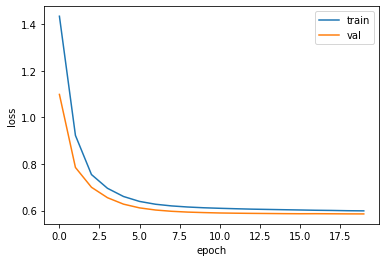

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

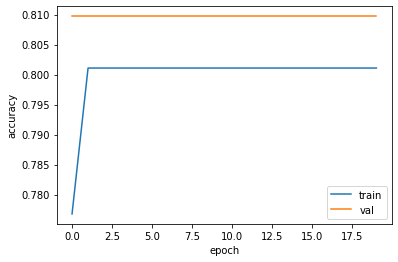

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
from tensorflow.keras.layers import Dropout
clear_session()

model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(1158,), kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu', kernel_regularizer='l2'))
model.add(Dropout(0.5))
model.add(Dense(6, activation='softmax', kernel_regularizer='l2'))

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

model.compile(optimizer='RMSprop', loss='categorical_crossentropy', metrics=['accuracy'])

earlystop = EarlyStopping(monitor='val_loss', patience=2, verbose=True)
chkpt = ModelCheckpoint('checkpoint.h5', monitor='val_loss', verbose=True, save_best_only=True, save_weights_only=True)

history = model.fit(X_train, y_train, epochs=15, validation_split=0.2, callbacks=[earlystop, chkpt])

loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

Epoch 1/15
89/93 [===========================>..] - ETA: 0s - loss: 2.0418 - accuracy: 0.7879
Epoch 1: val_loss improved from inf to 1.13634, saving model to checkpoint.h5
93/93 [==============================] - 2s 8ms/step - loss: 2.0048 - accuracy: 0.7903 - val_loss: 1.1363 - val_accuracy: 0.8097
Epoch 2/15
86/93 [==========================>...] - ETA: 0s - loss: 0.9821 - accuracy: 0.8009
Epoch 2: val_loss improved from 1.13634 to 0.79185, saving model to checkpoint.h5
93/93 [==============================] - 0s 5ms/step - loss: 0.9712 - accuracy: 0.8011 - val_loss: 0.7918 - val_accuracy: 0.8097
Epoch 3/15
84/93 [==========================>...] - ETA: 0s - loss: 0.7838 - accuracy: 0.8017
Epoch 3: val_loss improved from 0.79185 to 0.70165, saving model to checkpoint.h5
93/93 [==============================] - 0s 5ms/step - loss: 0.7791 - accuracy: 0.8011 - val_loss: 0.7017 - val_accuracy: 0.8097
Epoch 4/15
85/93 [==========================>...] - ETA: 0s - loss: 0.7171 - accuracy: 0.

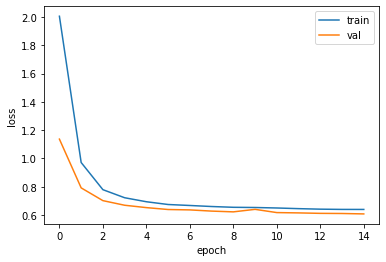

In [ ]:
plt.figure()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

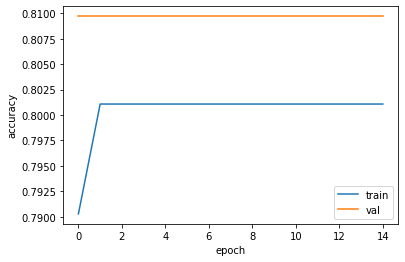

In [ ]:
plt.figure()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'val'])
plt.show()